<a href="https://colab.research.google.com/github/ShreyashDhoot/learning-pytorch/blob/main/PyTorch_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification using PyTorch

In [143]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

## 1. Make classification data and get it ready

In [144]:
n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [145]:
len(X),len(y)

(1000, 1000)

In [146]:
print(f"first five samples of X:{X[:5]}")
print(f"first five samples of y:{y[:5]}")

first five samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first five samples of y:[1 1 1 1 0]


In [147]:
circles=pd.DataFrame({"X1": X[:,0],
                      "X2":X[:,1],
                     "label":y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


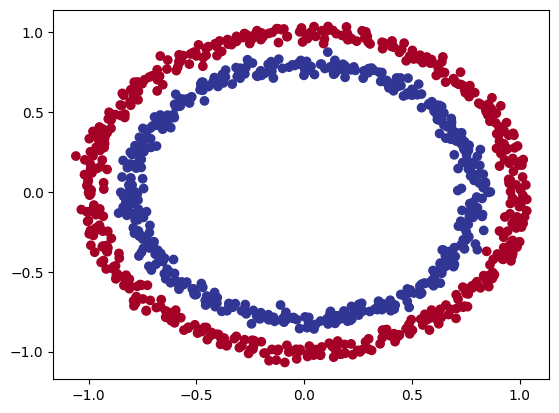

In [148]:
## Visualize the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
### given the x and y coordinate we have to predict which circle it belongs to

### 1.1 Check input and Output shapes

In [149]:
X.shape, y.shape


((1000, 2), (1000,))

### 1.2 Turn data into tensors


In [150]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [151]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [152]:
X.dtype, y.dtype

(torch.float32, torch.float32)

### 1.3 splitting the data into training and test set


In [153]:
# splits the data without randomization which might not be a very good idea seeing our data distibution and non linearity
'''
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
'''

'\ntrain_split=int(0.8*len(X))\nX_train,y_train=X[:train_split],y[:train_split]\nX_test,y_test=X[train_split:],y[train_split:]\n'

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,# <= Train and test data
                                               test_size=0.2, # <= % of test split out of the total data
                                               random_state=42) #<- manual_state would only affect PyTorch code and not sklearn code => explicit need to mention here

In [155]:
print(f"X_train size => {X_train.size()}")
print(f"X_test size => {X_test.size()}")
print(f"y_train size => {y_train.size()}")
print(f"y_test size => {y_test.size()}")

X_train size => torch.Size([800, 2])
X_test size => torch.Size([200, 2])
y_train size => torch.Size([800])
y_test size => torch.Size([200])


## 2. Building a Model

steps
1. Setup device agnostic code
2. construct a model by subclassing nn.Module
3. define a loss function and optimizer

### 2.1 setup device agnostic code

In [156]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [157]:
device

'cuda'

### 2.2 configuring and building a model

In [158]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    # create 2 nn.Linear layers suitable for our data
    self.layer_1=nn.Linear(in_features=2,out_features=7) # <=takes in 2 features and expands to 7
    self.layer_2=nn.Linear(in_features=7,out_features=1)  # <=Takes in 7 features and compresses it to 1 output

    # define a forward method that outlines a forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

#start an instance of our model and send it to proper device
torch.manual_seed(42)
model_0=NeuralNetwork().to(device)
model_0

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=7, bias=True)
  (layer_2): Linear(in_features=7, out_features=1, bias=True)
)

In [159]:
## Let's make the model using sequential
torch.manual_seed(42)
model_1=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [160]:

model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.3410, -0.0998,  0.5451,  0.1045, -0.3301,  0.1802, -0.3258],
                     device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0443, -0.1535,  0.2507, -0.2984, -0.1742, -0.1067, -0.2273]],
                     device='cuda:0')),
             ('layer_2.bias', tensor([0.0357], device='cuda:0'))])

In [161]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('1.bias', tensor([-0.2060], device='cuda:0'))])

In [162]:
# make some predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
  print(f"first 10 predictions : {untrained_preds[:10]}\n")
  print(f"first 10 labels : {y_test[:10]}")

first 10 predictions : tensor([[ 0.2303],
        [ 0.0972],
        [ 0.4638],
        [ 0.1646],
        [ 0.2806],
        [ 0.2008],
        [-0.0288],
        [-0.0050],
        [ 0.4712],
        [ 0.0863]], device='cuda:0')

first 10 labels : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.3 setup loss function & optimizer

In [163]:
loss_fn = nn.BCEWithLogitsLoss() # <=simoid already built in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [164]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  return correct/len(y_pred)*100

## 3. Model training

### 3.1 Writing a training loop

##### NOTE: read documentation on BCEwithLogitsLoss and BCELoss difference
            -> try and understand why are we calculating loss with logits here cause generally we calculate BCE loss after it has passed through sigmoid

In [165]:
torch.manual_seed(42)
# setting the number of epochs
epochs=1000

# Getting the data to device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  # setup model in train mode
  model_0.train()

  # make predictions on train data
  y_logits=model_0(X_train).squeeze() # <= gives raw logits
  y_pred = torch.round(torch.sigmoid(y_logits)) # -> turns logits -> prediction probs (btwn 0 to 1) -> prediction labels 0 or 1

  # calculate loss on X_train predictions of y_train
  loss=loss_fn(y_logits, # <= nn.BCEWithLogitsLoss expects raw logits (internally has sigmoid + BCE {more stable})
               y_train)
  '''
  # if we had only BCELoss
  loss=loss_fn(torch.sigmoid(y_logits),y_train)
  '''
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()

  # perform backprop on loss
  loss.backward()
  # gradient descent
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
    # Print shit out
    if epoch % 100 ==0 :
      print(f"epoch no => {epoch}| Loss => {loss:.5f} | accuracy => {acc:.2f}% \n Test loss : {test_loss:.5f} | Test accuracy {test_acc:.2f} %")
      print("----------------------------------------------------------------------")


epoch no => 0| Loss => 0.70657 | accuracy => 56.25% 
 Test loss : 0.69874 | Test accuracy 59.00 %
----------------------------------------------------------------------
epoch no => 100| Loss => 0.70052 | accuracy => 54.25% 
 Test loss : 0.69384 | Test accuracy 53.00 %
----------------------------------------------------------------------
epoch no => 200| Loss => 0.69772 | accuracy => 52.50% 
 Test loss : 0.69200 | Test accuracy 53.00 %
----------------------------------------------------------------------
epoch no => 300| Loss => 0.69624 | accuracy => 51.38% 
 Test loss : 0.69135 | Test accuracy 52.50 %
----------------------------------------------------------------------
epoch no => 400| Loss => 0.69535 | accuracy => 51.00% 
 Test loss : 0.69120 | Test accuracy 52.00 %
----------------------------------------------------------------------
epoch no => 500| Loss => 0.69476 | accuracy => 51.12% 
 Test loss : 0.69126 | Test accuracy 53.50 %
-----------------------------------------------

## 4. Make Predictions and evaluate the model

from the metrics it looks like our model isnt learning so lets make prediction and visualize them to see what is happening

In [166]:
import requests
from pathlib import Path

# Download helper function from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("Helper function exists so skipping download")
else:
  print("Downloading Helper function")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions , plot_decision_boundary

Helper function exists so skipping download


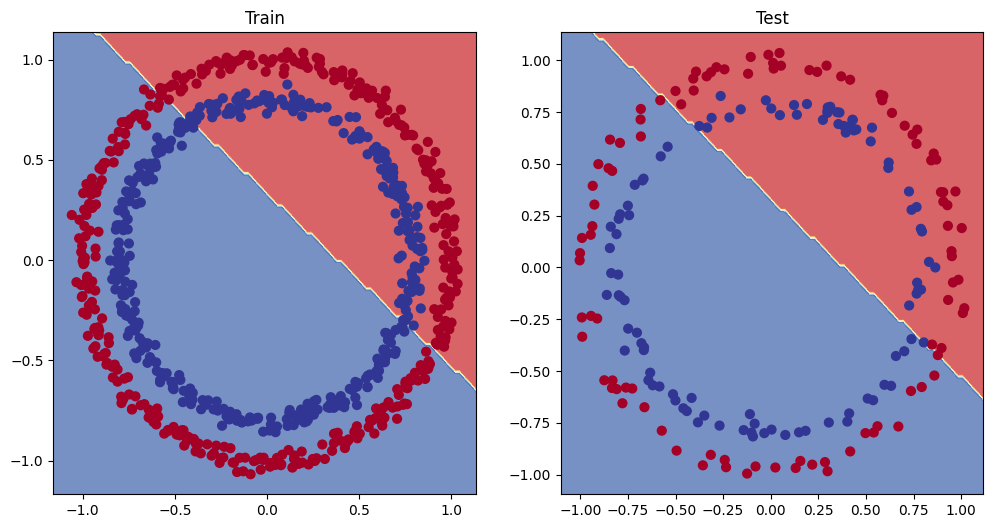

In [167]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving a model

* Add more layers
* Add more hidden layers
* fit for longer
* changing the activation functions
* changing the learning rate
* change the loss function

These options are from model's perspective as they toy with model and not data

### 5.1 | Exp 1 - increasing layers , neurons , epochs

In [168]:
class NeuralNet_1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10) # <= number of neurons increased
    self.layer_3=nn.Linear(in_features=10,out_features=1) # <= Layer added

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

torch.manual_seed(42)
model_2=NeuralNet_1().to(device)
model_2

NeuralNet_1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [169]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [170]:
torch.manual_seed(42)
epochs=1000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model_2.train()
  y_logits=model_2(X_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_train,y_preds)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits=model_2(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%100==0:
    print(f"Epochs : {epoch} | loss : {loss:.5f} | accuracy : {acc:.2f}% | test loss : {test_loss:.5f} | test_accuracy : {test_acc:.2f}%")
    print("-------------------------------------------------------------------")

Epochs : 0 | loss : 0.71195 | accuracy : 50.62% | test loss : 0.69261 | test_accuracy : 51.00%
-------------------------------------------------------------------
Epochs : 100 | loss : 0.71195 | accuracy : 50.62% | test loss : 0.69261 | test_accuracy : 51.00%
-------------------------------------------------------------------
Epochs : 200 | loss : 0.71195 | accuracy : 50.62% | test loss : 0.69261 | test_accuracy : 51.00%
-------------------------------------------------------------------
Epochs : 300 | loss : 0.71195 | accuracy : 50.62% | test loss : 0.69261 | test_accuracy : 51.00%
-------------------------------------------------------------------
Epochs : 400 | loss : 0.71195 | accuracy : 50.62% | test loss : 0.69261 | test_accuracy : 51.00%
-------------------------------------------------------------------
Epochs : 500 | loss : 0.71195 | accuracy : 50.62% | test loss : 0.69261 | test_accuracy : 51.00%
-------------------------------------------------------------------
Epochs : 600

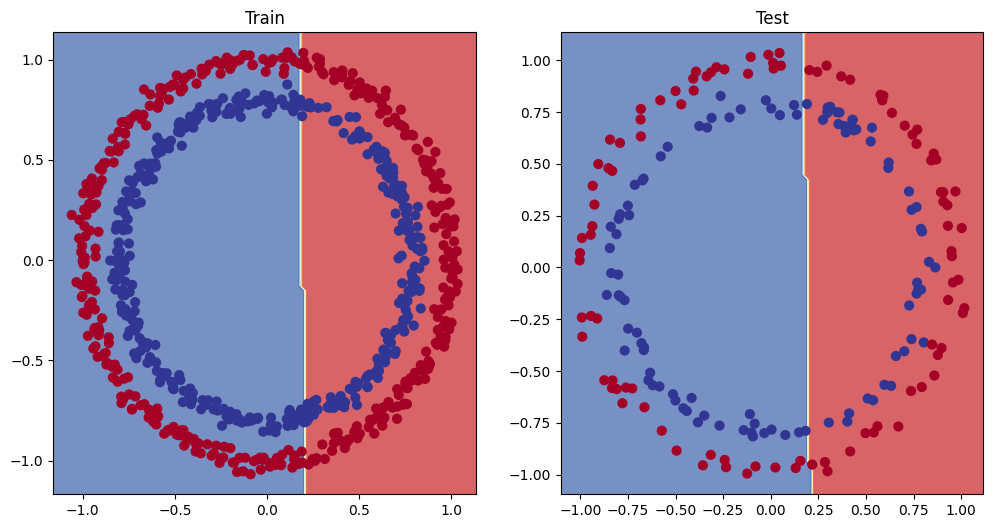

In [171]:
## plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)

### 5.2 | Exp 2 - Introducing non linearinty

In [172]:
class nonlinearnet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=nonlinearnet().to(device)
model_3

nonlinearnet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [173]:
optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)
loss_fn=nn.BCEWithLogitsLoss()

In [174]:
torch.manual_seed(52)
epochs=2000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model_3.train()
  train_logits=model_3(X_train).squeeze()
  y_preds=torch.round(torch.sigmoid(train_logits))
  loss=loss_fn(train_logits,y_train)
  accuracy=accuracy_fn(y_true=y_train,y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%200==0:
    print(f"epoch : {epoch} | loss : {loss:.5f} | accuracy : {accuracy:.2f}% test loss : {test_loss:.5f} | test accuracy : {test_acc:.2f}%")
    print("-----------------------------------------------------------------------------------------------------------------------------------")


epoch : 0 | loss : 0.69295 | accuracy : 50.00% test loss : 0.69319 | test accuracy : 50.00%
-----------------------------------------------------------------------------------------------------------------------------------
epoch : 200 | loss : 0.68977 | accuracy : 53.37% test loss : 0.68940 | test accuracy : 55.00%
-----------------------------------------------------------------------------------------------------------------------------------
epoch : 400 | loss : 0.68517 | accuracy : 52.75% test loss : 0.68411 | test accuracy : 56.50%
-----------------------------------------------------------------------------------------------------------------------------------
epoch : 600 | loss : 0.67515 | accuracy : 54.50% test loss : 0.67285 | test accuracy : 56.00%
-----------------------------------------------------------------------------------------------------------------------------------
epoch : 800 | loss : 0.65160 | accuracy : 64.00% test loss : 0.64757 | test accuracy : 67.50%
----

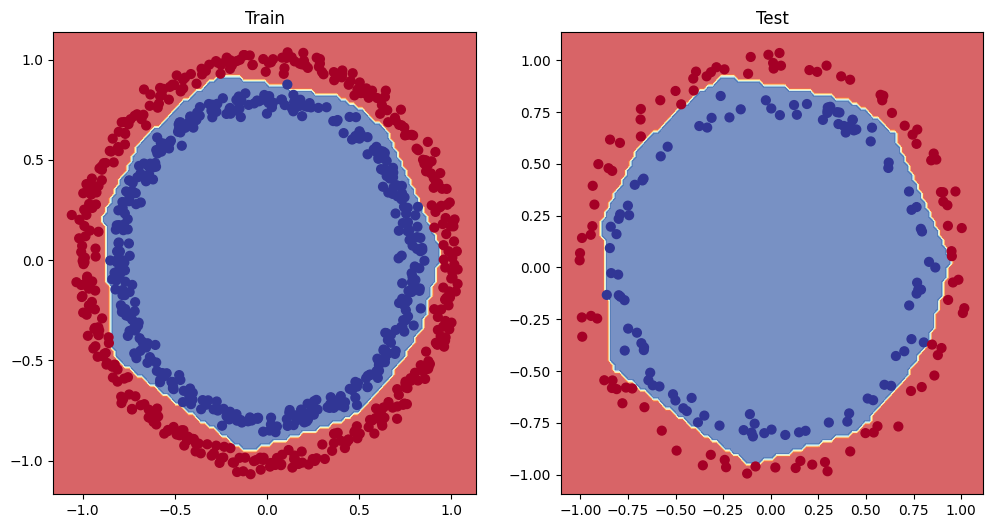

In [175]:
## plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)